In [1]:
#!pip install tensorflow-gpu

In [2]:
import tensorflow as tf
print(tf.__version__)

2.8.0


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
from tensorflow.keras.datasets import mnist
(x_train,y_train),(x_test,y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [5]:
x_train.shape,x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [6]:
y_train.shape,y_test.shape

((60000,), (10000,))

In [7]:
x_train.min(),x_train.max()

(0, 255)

In [8]:
y_train.min(),y_train.max()

(0, 9)

In [9]:
# normalize the dataset
x_train = x_train/255.0
x_test = x_test/255.0

In [10]:
x_train.min(),x_train.max()

(0.0, 1.0)

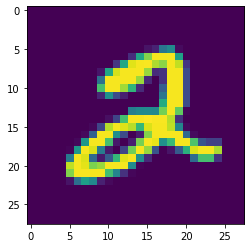

In [11]:
plt.imshow(x_train[5])

In [12]:
y_train[5]

2

## BUILDING THE LSTM

In [16]:
# define the object (initialize the RNN)
model = tf.keras.models.Sequential()

In [17]:
# 1st LSTM layer
model.add(tf.keras.layers.LSTM(units=128,activation="relu",return_sequences=True,input_shape=(28,28)))
# return sequences =True as one more LSTM layer after this. If dense layer after this, return sequences=False.
# adding dropout layer
model.add(tf.keras.layers.Dropout(0.2))
# 2nd LSTM layer
model.add(tf.keras.layers.LSTM(units=128,activation="relu"))
model.add(tf.keras.layers.Dropout(0.2))
# fully connected layer (1st dense layer)
model.add(tf.keras.layers.Dense(units=32,activation="relu"))
model.add(tf.keras.layers.Dropout(0.2))
# output layer
model.add(tf.keras.layers.Dense(10,activation="softmax"))

In [18]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 28, 128)           80384     
                                                                 
 dropout_2 (Dropout)         (None, 28, 128)           0         
                                                                 
 lstm_4 (LSTM)               (None, 128)               131584    
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense (Dense)               (None, 32)                4128      
                                                                 
 dropout_4 (Dropout)         (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 10)               

In [19]:
opt = tf.keras.optimizers.Adam(learning_rate=0.001)

In [20]:
model.compile(optimizer=opt,loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [21]:
history = model.fit(x_train,y_train,epochs=10,validation_data=(x_test,y_test))

Epoch 1/10
1875/1875 [==============================] - 117s 60ms/step - loss: 0.5277 - accuracy: 0.8326 - val_loss: 0.1348 - val_accuracy: 0.9585
Epoch 2/10
1875/1875 [==============================] - 112s 60ms/step - loss: 0.1575 - accuracy: 0.9582 - val_loss: 0.0881 - val_accuracy: 0.9764
Epoch 3/10
1875/1875 [==============================] - 110s 58ms/step - loss: 0.1113 - accuracy: 0.9706 - val_loss: 0.0662 - val_accuracy: 0.9821
Epoch 4/10
1875/1875 [==============================] - 109s 58ms/step - loss: 0.0836 - accuracy: 0.9780 - val_loss: 0.0622 - val_accuracy: 0.9835
Epoch 5/10
1875/1875 [==============================] - 109s 58ms/step - loss: 0.0778 - accuracy: 0.9802 - val_loss: 0.0449 - val_accuracy: 0.9879
Epoch 6/10
1875/1875 [==============================] - 111s 59ms/step - loss: 0.0577 - accuracy: 0.9851 - val_loss: 0.0685 - val_accuracy: 0.9810
Epoch 7/10
1875/1875 [==============================] - 111s 59ms/step - loss: 0.0513 - accuracy: 0.9861 - val_loss: 0

In [22]:
# model predictions
predict_x=model.predict(x_test) 
y_pred=np.argmax(predict_x,axis=1)

In [23]:
y_pred[7],y_test[7]

(9, 9)

In [24]:
# confusion matrix
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[ 974    0    0    1    0    1    1    1    2    0]
 [   0 1133    1    0    0    0    0    1    0    0]
 [   2    2 1022    0    1    0    0    3    2    0]
 [   0    0    1  997    0    5    0    2    2    3]
 [   0    1    0    0  972    0    0    1    1    7]
 [   0    1    0    4    0  884    1    0    1    1]
 [   4    4    2    0    0    4  943    0    1    0]
 [   0    3    4    0    0    0    0 1013    0    8]
 [   1    0    1    0    0    1    1    1  968    1]
 [   0    0    0    0    6    0    0    4    3  996]]


In [25]:
acc_cm = accuracy_score(y_test,y_pred)
print(acc_cm)

0.9902


In [28]:
# Plotting the learning curve
def learning_curve(history,epoch):
  # training vs validation accuracy
  epoch_range = range(1,epoch+1)
  plt.plot(epoch_range,history.history['accuracy'])
  plt.plot(epoch_range,history.history['val_accuracy'])
  plt.title("Model Accuracy")
  plt.ylabel("Accuracy")
  plt.xlabel("Epoch")
  plt.legend(['Train','val'],loc='upper left')
  plt.show()
  # training vs validation loss
  epoch_range = range(1,epoch+1)
  plt.plot(epoch_range,history.history['loss'])
  plt.plot(epoch_range,history.history['val_loss'])
  plt.title("Model Loss")
  plt.ylabel("Loss")
  plt.xlabel("Epoch")
  plt.legend(['Train','val'],loc='upper left')
  plt.show()

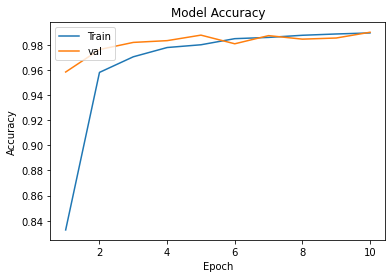

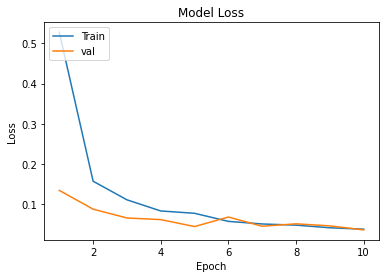

In [29]:
learning_curve(history,10)